<a href="https://colab.research.google.com/github/Mahabubjamil/ColabNotebook/blob/main/IOT_project_ML_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Abu Sayeed Mohammad(201-15-14206)***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Project_2/archive (1)/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Project_2/archive (1)/test.csv")

In [3]:
train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head(5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
import re  #Regular expression
import nltk #for Text manipulation
import string
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth',200)

In [6]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

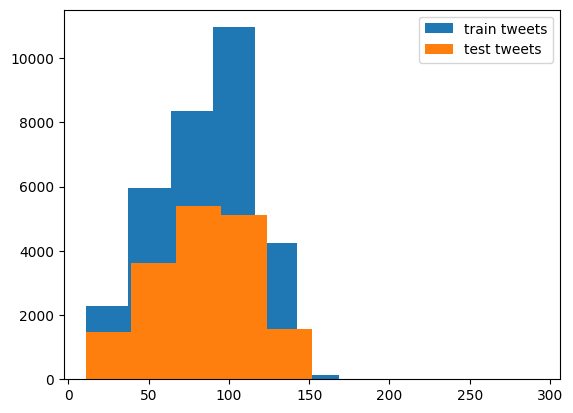

In [8]:

length_train= train['tweet'].str.len()
plt.hist(length_train,label='train tweets')
length_test= test['tweet'].str.len()
plt.hist(length_test,label='test tweets')
plt.legend()
plt.show()

In [9]:
combi= train.append(test,ignore_index=True)
combi.shape

(49159, 3)

In [10]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt= re.sub(i,'',input_txt)
    return input_txt

In [11]:
combi['tidy_tweets']=np.vectorize(remove_pattern)(combi['tweet'],'@[\w]*')
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
combi['tidy_tweets']=combi['tidy_tweets'].str.replace('[^a-zA-Z#]'," ")
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:
combi['tidy_tweets']=combi['tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


***Mahabub Jamil Showvik (201-15-13819)***

In [14]:
#Tokenizing the tweet- Tokens are individual text whereas tokenisation is the process of splitting a string into tokens
tokenized_tweet= combi['tidy_tweets'].apply(lambda x:x.split()) #Tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweets, dtype: object

In [15]:
#Normalisation
from nltk.stem.porter import *
stemmer= PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #Stemming
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweets, dtype: object

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=''.join(tokenized_tweet[i])
combi['tidy_tweet']=tokenized_tweet
combi.head()

,id,label,tweet,tidy_tweets,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run,whenfatherdysfunctselfishdragkidintodysfunct#run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked,thank#lyftcreditcaustheyofferwheelchairvan#disapoint#getthank
2,3,0.0,bihday your majesty,bihday your majesty,bihdayyourmajesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time,#modellovetakewithtime
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,factsguidsocieti#motiv


In [17]:
#Wordcloud- is a way of visualisation where most frequent words appear in large size and the less frequent words small
all_words=' '.join([text for text in combi['tidy_tweets']])

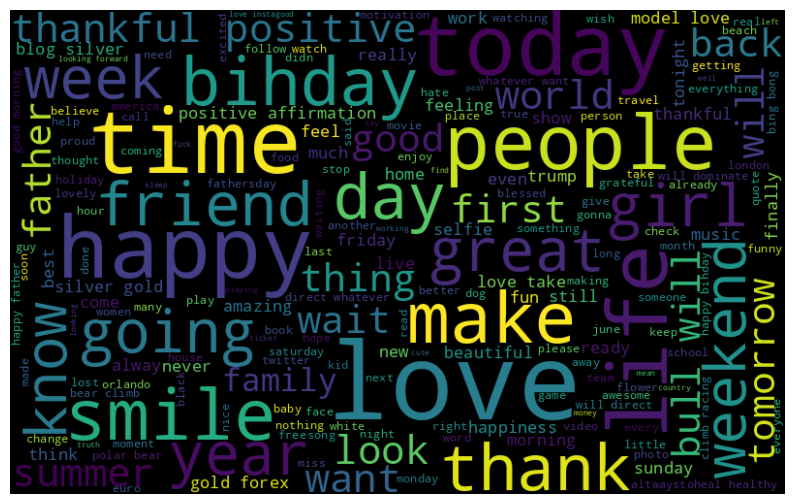

In [18]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500, random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

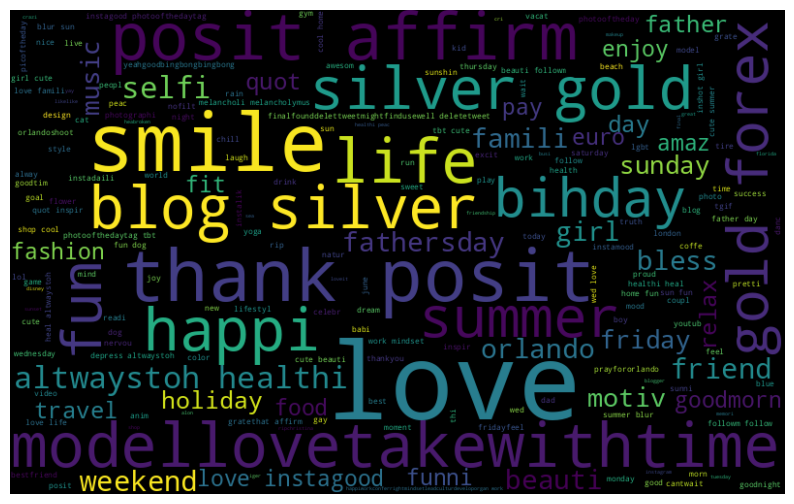

In [19]:
normal_words= ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud=WordCloud(width=800,height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
#Creating a function to extract hashtags from tweet
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht= re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

#Extracting regular hashtags
HT_regular=hashtag_extract(combi['tidy_tweet'][combi['label']==0])

#Extracting Sexist hashtags
HT_negative=hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [21]:
HT_regular[1:5]

[['lyftcreditcaustheyofferwheelchairvan', 'disapoint', 'getthank'],
 [],
 ['modellovetakewithtime'],
 ['motiv']]

In [22]:
#Unnesting list
HT_regular= sum(HT_regular,[])
HT_regular[1:5]

['lyftcreditcaustheyofferwheelchairvan',
 'disapoint',
 'getthank',
 'modellovetakewithtime']

In [23]:
HT_negative=sum(HT_negative,[])
HT_negative[1:5]

['michiganmiddlschoolbuildwallchant', 'tcot', 'australia', 'opkillingbay']

In [24]:
a=nltk.FreqDist(HT_regular)
a

FreqDist({'love': 1539, 'posit': 897, 'smile': 622, 'thank': 515, 'healthi': 504, 'fun': 450, 'affirm': 422, 'life': 397, 'summer': 371, 'cute': 356, ...})

In [25]:
b=nltk.FreqDist(HT_negative)
b

FreqDist({'polit': 94, 'liber': 76, 'libtard': 74, 'sjw': 74, 'trump': 69, 'retweet': 63, 'miami': 44, 'tampa': 32, 'bigot': 30, 'hate': 27, ...})

In [26]:
d=pd.DataFrame({'hashtag': list(a.keys()), 'count': list(a.values())})
d.head()

,hashtag,count
0,run,63
1,lyftcreditcaustheyofferwheelchairvan,1
2,disapoint,1
3,getthank,2
4,modellovetakewithtime,325


In [27]:
d=d.nlargest(columns='count',n=20)
d

,hashtag,count
32,love,1539
39,posit,897
210,smile,622
38,thank,515
158,healthi,504
178,fun,450
92,affirm,422
354,life,397
296,summer,371
367,cute,356


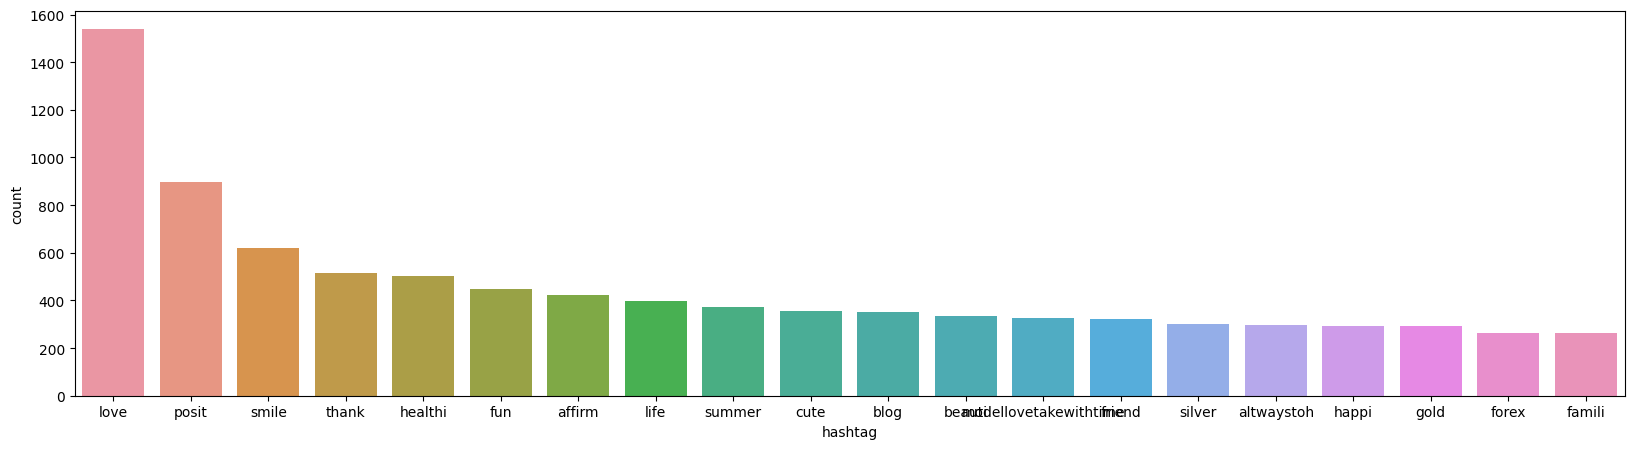

In [28]:
#Visualizing the regular hashtags with the help of barplot
plt.figure(figsize=(20,5))
sns.barplot(data=d, x='hashtag', y='count')
plt.show()

In [29]:
e=pd.DataFrame({'hashtag': (b.keys()), 'count': (b.values())})
e.head()

,hashtag,count
0,cnncall,2
1,michiganmiddlschoolbuildwallchant,2
2,tcot,13
3,australia,5
4,opkillingbay,5


In [30]:
e=e.nlargest(columns='count',n=20)
e

,hashtag,count
32,polit,94
31,liber,76
29,libtard,74
30,sjw,74
147,trump,69
64,retweet,63
66,miami,44
65,tampa,32
74,bigot,30
38,hate,27


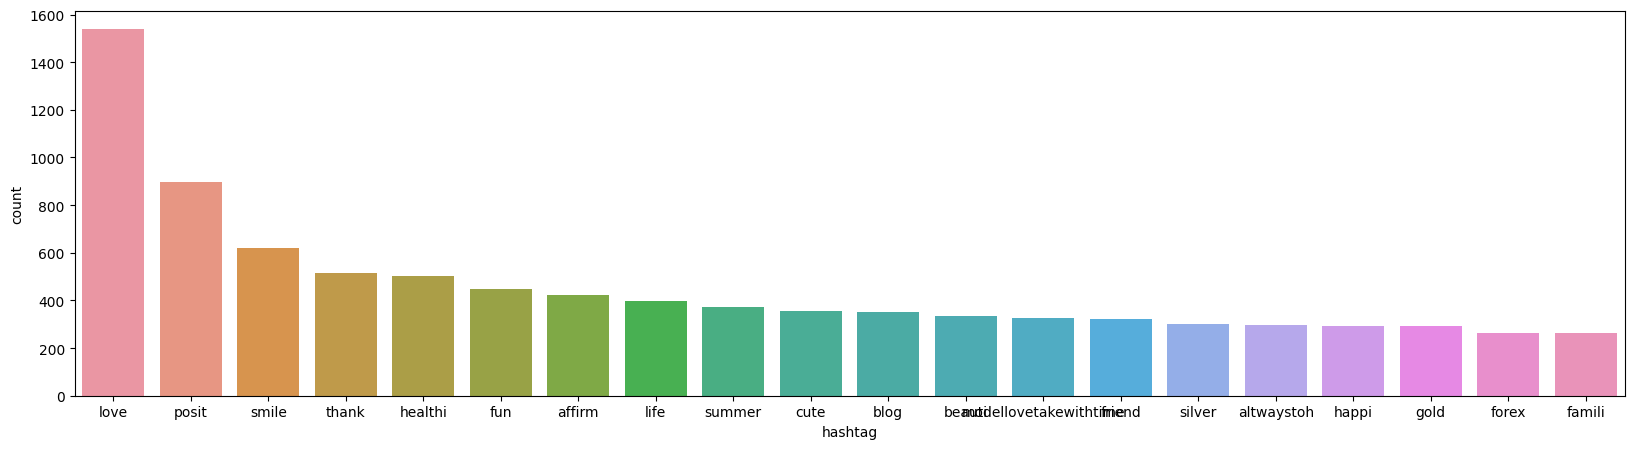

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(data=d, x='hashtag', y='count')
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [33]:
bow_vectorizer= CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow= bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [34]:
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf= tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [35]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow=bow[:31962,:]
test_bow=bow[31962:, :]

xtrain,xtest,ytrain,ytest=train_test_split(train_bow,train['label'], test_size=0.25, random_state=1)

lreg=LogisticRegression()
lreg.fit(xtrain,ytrain)
pred=lreg.predict_proba(xtest)
pred_int=pred[:,1]>=0.2

In [36]:
pred_int=pred_int.astype(np.int)
f1_score(ytest,pred_int)

0.4660691421254801

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [39]:
cnf_matrix=confusion_matrix(ytest,pred_int)
cnf_matrix

array([[7392,   59],
       [ 358,  182]])

Text(0.5, 427.9555555555555, 'Predicted label')

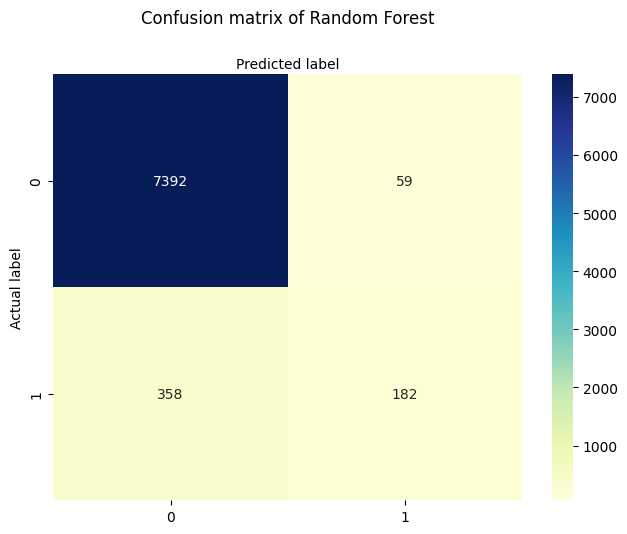

In [40]:
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int= test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg.csv',index=False)

In [42]:
#TFIDF- Features

train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]

xtrain_t,xtest_t,ytrain_t,ytest_t= train_test_split(train_tfidf, train['label'],test_size=0.3, random_state=42)

lreg.fit(xtrain_t,ytrain_t)
pred= lreg.predict_proba(xtest_t)
pred= pred[:,1]>=0.3
pred=pred.astype(np.int)

f1_score(ytest_t,pred)

0.439344262295082

In [43]:
from sklearn.svm import SVC

In [44]:
svc=SVC(kernel='linear', C=1, probability=True).fit(xtrain,ytrain)
pred=svc.predict_proba(xtest)
pred=pred[:,1]>=0.2
pred=pred.astype(np.int)
f1_score(ytest,pred)

0.4450331125827814

In [45]:
test_pred=(svc.predict_proba(test_bow)[:,1]>=0.3).astype(np.int)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('SVC.csv',index=False)

In [46]:
#TFIDF- Features

svc=SVC(kernel='linear', C=1, probability=True).fit(xtrain_t,ytrain_t)
pred=svc.predict_proba(xtest_t)
pred=pred[:,1]>=0.3
pred=pred.astype(np.int)
f1_score(ytest_t,pred)

0.42996742671009774

In [47]:
cnf_matrix=confusion_matrix(ytest_t,pred)
cnf_matrix

array([[8866,   39],
       [ 486,  198]])

Text(0.5, 427.9555555555555, 'Predicted label')

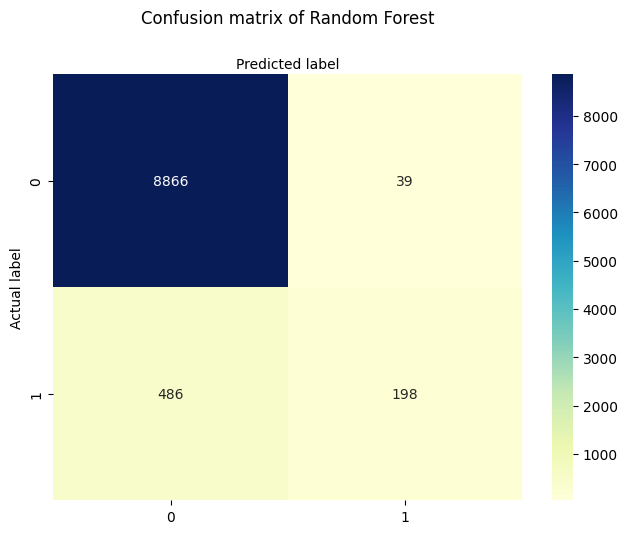

In [48]:
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

***Mahabub Jamil Showvik(201-15-13819)***